In [2]:
import pandas as pd
pd.set_option('display.max_columns', 56)
import numpy as np
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

### Config

In [3]:
# DATA PATHS
TRAIN_PATH = 'data/data_training.csv'
PROV_PATH = 'data/data_provisional.csv'
SAMPLE_PATH = 'data/sample-data.csv'

# Load data
sample_data = pd.read_csv(SAMPLE_PATH)

In [10]:
# number of lines in train data
num_lines = sum(1 for line in open(TRAIN_PATH))
print(num_lines)

49048652


In [4]:
# number of lines in provisional data
num_lines = sum(1 for line in open(PROV_PATH))
print(num_lines)

46010963


### Explore sample

In [14]:
df = sample_data.copy()

In [6]:
df.shape

(31123, 56)

In [17]:
df.sample(10)

,time,test_suite,induced_state,tlx_score,E4_BVP,E4_GSR,LooxidLink_EEG_A3,LooxidLink_EEG_A4,LooxidLink_EEG_FP1,LooxidLink_EEG_FP2,LooxidLink_EEG_A7,LooxidLink_EEG_A8,Muse_EEG_TP9,Muse_EEG_AF7,Muse_EEG_AF8,Muse_EEG_TP10,Muse_PPG_0,Muse_PPG_1,Muse_PPG_2,Myo_GYR_X,Myo_GYR_Y,Myo_GYR_Z,Myo_EMG_0,Myo_EMG_1,Myo_EMG_2,Myo_EMG_3,Myo_EMG_4,Myo_EMG_5,Myo_EMG_6,Myo_EMG_7,PICARD_fnirs_0,PICARD_fnirs_1,Polar_bpm,Polar_hrv,ViveEye_eyeOpenness_L,ViveEye_pupilDiameter_L,ViveEye_pupilPos_L_X,ViveEye_pupilPos_L_Y,ViveEye_gazeOrigin_L_X,ViveEye_gazeOrigin_L_Y,ViveEye_gazeOrigin_L_Z,ViveEye_gazeDirection_L_X,ViveEye_gazeDirection_L_Y,ViveEye_gazeDirection_L_Z,ViveEye_eyeOpenness_R,ViveEye_pupilDiameter_R,ViveEye_pupilPos_R_X,ViveEye_pupilPos_R_Y,ViveEye_gazeOrigin_R_X,ViveEye_gazeOrigin_R_Y,ViveEye_gazeOrigin_R_Z,ViveEye_gazeDirection_R_X,ViveEye_gazeDirection_R_Y,ViveEye_gazeDirection_R_Z,Zephyr_HR,Zephyr_HRV
28053,1633019028501738,Training-Test-084,high,50,-1.214763,0.061734,0.041340,0.057644,0.105910,0.158941,0.170748,0.186963,-6.34766,-5.85938,-13.6719,-9.27734,441.0,70915.0,17440.0,-6.87549,-7.87451,-8.12939,-1.0,1.0,-3.0,-2.0,-3.0,3.0,2.0,0.0,13546.0,35851.0,72.0,64.0797,0.889253,3.62189,0.533242,0.580750,32.0331,-0.926544,-28.3254,-0.060776,0.071686,0.995560,0.942750,3.96526,0.408176,0.650546,-28.5797,-3.881180,-25.9974,0.015579,0.074158,0.997116,65.0,103.0
12184,1627502245500397,Training-Test-013,low,30,-54.807640,9.549160,-0.006167,-0.013988,0.018005,0.074691,0.044274,0.010121,-40.52730,-36.13280,-35.6445,-36.13280,450.0,85970.0,33312.0,6.24902,7.25342,-8.99902,2.0,1.0,-2.0,-9.0,6.0,8.0,-3.0,6.0,7067.0,17150.0,0.0,0.0000,0.109877,-1.00000,-1.000000,-1.000000,32.6036,-8.648620,-27.4846,0.000000,0.000000,0.000000,0.004184,-1.00000,-1.000000,-1.000000,-27.1708,-9.318150,-26.3026,0.000000,0.000000,0.000000,78.0,51.0
4437,1626472212501374,Training-Test-019,low,20,1.138395,0.167743,-0.027241,0.024546,0.122265,0.139855,0.117255,0.089571,-19.53130,-39.55080,-28.8086,-29.78520,433.0,67602.0,4709.0,-11.62890,12.74850,14.50100,-2.0,-1.0,0.0,-3.0,-1.0,-2.0,-3.0,-2.0,783.0,7362.0,82.0,77.5647,1.000000,3.46727,0.368134,0.516489,37.0695,-0.790176,-22.5140,0.011658,0.190674,0.981567,1.000000,3.49176,0.590718,0.508695,-33.8585,-0.658386,-22.2616,-0.067322,0.194626,0.978561,76.0,72.0
7965,1627337981500009,Training-Test-066,channelized,28,5.790771,0.508618,0.035768,0.034712,0.049345,0.068019,0.035641,0.001416,-36.62110,-25.87890,-34.6680,-27.83200,454.0,99407.0,27355.0,-11.12500,9.37207,-3.75342,1.0,-3.0,0.0,-1.0,8.0,1.0,2.0,1.0,11544.0,26739.0,101.0,13.8364,0.847941,5.47510,0.467463,0.697360,33.3511,-2.932250,-25.1429,0.109283,-0.310455,0.944275,0.811709,5.09520,0.402508,0.723517,-28.8177,-4.199840,-23.5688,0.084030,-0.323273,0.942566,99.0,23.0
16187,1628018226500679,Training-Test-063,channelized,25,35.111360,0.540364,0.025030,0.003337,0.079573,0.051790,0.041176,0.063713,-30.76170,-30.27340,-36.1328,-26.36720,447.0,84044.0,25711.0,-9.00000,-1.37891,14.87650,3.0,7.0,8.0,7.0,5.0,1.0,2.0,2.0,9338.0,32281.0,60.0,103.9260,0.970740,4.14348,0.504465,0.667674,32.5021,-1.847090,-27.1072,0.063324,-0.236206,0.969635,0.823874,4.41478,0.316424,0.581470,-25.9961,-0.435455,-24.0295,0.043808,-0.198776,0.979050,58.0,99.0
21096,1628713758500149,Training-Test-018,medium,0,-12.252230,0.261234,0.093441,0.023588,0.187311,0.100638,0.042455,0.064489,-540.52700,-407.71500,-26.8555,-47.85160,998.0,117750.0,29335.0,-14.75000,2.74854,6.99609,3.0,-7.0,4.0,-2.0,-3.0,-3.0,60.0,21.0,22784.0,65535.0,84.0,29.1510,0.616587,-1.00000,0.547240,0.444624,31.8147,4.179110,-28.8902,0.000000,0.000000,0.000000,0.696064,-1.00000,0.441732,0.417307,-28.9318,5.286670,-29.9951,0.000000,0.000000,0.000000,81.0,36.0
22186,1629493019500686,Training-Test-078,baseline,0,32.013810,0.306321,0.058363,-0.002173,0.099146,0.087691,0.066849,0.057466,-843.75000,-36.13280,-15.6250,-34.66800,431.0,105172.0,32852.0,10.00000,-6.87158,-2.00146,-12.0,-3.0,-5.0,-8.0,-4.0,-21.0,-30.0,-5.0,20800.0,40123.0,72.0,47.4830,1.000000,

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31123 entries, 0 to 31122
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       31123 non-null  int64  
 1   test_suite                 31123 non-null  object 
 2   induced_state              31123 non-null  object 
 3   tlx_score                  31123 non-null  int64  
 4   E4_BVP                     31123 non-null  float64
 5   E4_GSR                     31123 non-null  float64
 6   LooxidLink_EEG_A3          31123 non-null  float64
 7   LooxidLink_EEG_A4          31123 non-null  float64
 8   LooxidLink_EEG_FP1         31123 non-null  float64
 9   LooxidLink_EEG_FP2         31123 non-null  float64
 10  LooxidLink_EEG_A7          31123 non-null  float64
 11  LooxidLink_EEG_A8          31123 non-null  float64
 12  Muse_EEG_TP9               31123 non-null  float64
 13  Muse_EEG_AF7               31123 non-null  flo

In [110]:
df.describe()

,time,tlx_score,E4_BVP,E4_GSR,LooxidLink_EEG_A3,LooxidLink_EEG_A4,LooxidLink_EEG_FP1,LooxidLink_EEG_FP2,LooxidLink_EEG_A7,LooxidLink_EEG_A8,Muse_EEG_TP9,Muse_EEG_AF7,Muse_EEG_AF8,Muse_EEG_TP10,Muse_PPG_0,Muse_PPG_1,Muse_PPG_2,Myo_GYR_X,Myo_GYR_Y,Myo_GYR_Z,Myo_EMG_0,Myo_EMG_1,Myo_EMG_2,Myo_EMG_3,Myo_EMG_4,Myo_EMG_5,Myo_EMG_6,Myo_EMG_7,PICARD_fnirs_0,PICARD_fnirs_1,Polar_bpm,Polar_hrv,ViveEye_eyeOpenness_L,ViveEye_pupilDiameter_L,ViveEye_pupilPos_L_X,ViveEye_pupilPos_L_Y,ViveEye_gazeOrigin_L_X,ViveEye_gazeOrigin_L_Y,ViveEye_gazeOrigin_L_Z,ViveEye_gazeDirection_L_X,ViveEye_gazeDirection_L_Y,ViveEye_gazeDirection_L_Z,ViveEye_eyeOpenness_R,ViveEye_pupilDiameter_R,ViveEye_pupilPos_R_X,ViveEye_pupilPos_R_Y,ViveEye_gazeOrigin_R_X,ViveEye_gazeOrigin_R_Y,ViveEye_gazeOrigin_R_Z,ViveEye_gazeDirection_R_X,ViveEye_gazeDirection_R_Y,ViveEye_gazeDirection_R_Z,Zephyr_HR,Zephyr_HRV
count,3.112300e+04,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.00000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000,31123.000000
mean,1.629141e+15,29.271664,-286.436903,-295.323966,-163.195123,-163.195387,-163.121333,-163.127460,-163.134179,-163.136699,-722.230570,-690.007222,-689.819945,-690.397057,-282.397503,83587.099107,27049.015021,-287.162979,-287.375734,-287.728574,-274.112486,-274.240558,-274.305655,-274.233843,-274.369016,-274.252929,-274.215754,-274.219738,9581.470716,26703.623754,-228.252145,-201.71215,-297.914797,-295.199780,-298.320199,-298.299531,-269.015268,-299.568293,-325.880548,-299.132485,-299.110578,-298.245446,-297.618095,-295.191121,-299.087336,-298.958356,-326.347020,-298.584115,-325.364091,-298.172223,-298.131682,-297.281017,-228.189435,-242.642056
std,3.005851e+12,23.419044,1667.239725,1698.501651,1267.130497,1267.130463,1267.140002,1267.139213,1267.138348,1267.138024,2481.586729,2476.732136,2476.905873,2477.893259,2664.212005,33651.334350,18404.703741,1671.328113,1671.291483,1671.232701,1630.733319,1630.716935,1630.712513,1630.724079,1630.702869,1630.719530,1630.723450,1630.725752,8430.788683,16155.070211,1719.816128,1768.21063,1702.769758,1701.357949,1702.698620,1702.702250,1708.792273,1703.426915,1698.808876,1703.499357,1703.503209,1703.655136,1701.877911,1701.359457,1704.450162,1704.472831,1696.841867,1701.713611,1697.019297,1700.836370,1700.843483,1700.992620,1716.993004,1715.567913
min,1.626276e+15,0.000000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.90000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000
25%,1.627337e+15,10.000000,-10.045250,0.216389,0.003525,-0.002173,0.068293,0.061551,0.049186,0.044285,-56.640600,-41.503900,-45.410200,-42.480500,428.000000,70684.000000,10602.000000,-7.749510,-8.252440,-9.254390,-3.000000,-3.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,3927.000000,15594.000000,68.000000,27.59430,0.914894,2.643575,0.484333,0.479243,29.385900,-3.327150,-29.854700,-0.0

In [109]:
# all remaining float cols having a min of -9999.9 => possible default value
df.describe().loc['min'].value_counts()

-9.999900e+03    52
 1.626276e+15     1
 0.000000e+00     1
Name: min, dtype: int64

In [116]:
# ratio of -9999.9 (the potential default value) in each columns

for c in df.columns[4:]:
    print(f'--- {c} ---')
    print(sum(df[c] == df[c].min())/df.shape[1])

# sum(df['E4_BVP'] == df['E4_BVP'].min())/df.shape[1]

--- E4_BVP ---
15.892857142857142
--- E4_GSR ---
16.517857142857142
--- LooxidLink_EEG_A3 ---
9.071428571428571
--- LooxidLink_EEG_A4 ---
9.071428571428571
--- LooxidLink_EEG_FP1 ---
9.071428571428571
--- LooxidLink_EEG_FP2 ---
9.071428571428571
--- LooxidLink_EEG_A7 ---
9.071428571428571
--- LooxidLink_EEG_A8 ---
9.071428571428571
--- Muse_EEG_TP9 ---
36.714285714285715
--- Muse_EEG_AF7 ---
36.714285714285715
--- Muse_EEG_AF8 ---
36.714285714285715
--- Muse_EEG_TP10 ---
36.714285714285715
--- Muse_PPG_0 ---
38.839285714285715
--- Muse_PPG_1 ---
38.839285714285715
--- Muse_PPG_2 ---
38.839285714285715
--- Myo_GYR_X ---
15.982142857142858
--- Myo_GYR_Y ---
15.982142857142858
--- Myo_GYR_Z ---
15.982142857142858
--- Myo_EMG_0 ---
15.196428571428571
--- Myo_EMG_1 ---
15.196428571428571
--- Myo_EMG_2 ---
15.196428571428571
--- Myo_EMG_3 ---
15.196428571428571
--- Myo_EMG_4 ---
15.196428571428571
--- Myo_EMG_5 ---
15.196428571428571
--- Myo_EMG_6 ---
15.196428571428571
--- Myo_EMG_7 ---
15.

array([[<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'tlx_score'}>,
        <AxesSubplot:title={'center':'E4_BVP'}>,
        <AxesSubplot:title={'center':'E4_GSR'}>,
        <AxesSubplot:title={'center':'LooxidLink_EEG_A3'}>,
        <AxesSubplot:title={'center':'LooxidLink_EEG_A4'}>,
        <AxesSubplot:title={'center':'LooxidLink_EEG_FP1'}>],
       [<AxesSubplot:title={'center':'LooxidLink_EEG_FP2'}>,
        <AxesSubplot:title={'center':'LooxidLink_EEG_A7'}>,
        <AxesSubplot:title={'center':'LooxidLink_EEG_A8'}>,
        <AxesSubplot:title={'center':'Muse_EEG_TP9'}>,
        <AxesSubplot:title={'center':'Muse_EEG_AF7'}>,
        <AxesSubplot:title={'center':'Muse_EEG_AF8'}>,
        <AxesSubplot:title={'center':'Muse_EEG_TP10'}>],
       [<AxesSubplot:title={'center':'Muse_PPG_0'}>,
        <AxesSubplot:title={'center':'Muse_PPG_1'}>,
        <AxesSubplot:title={'center':'Muse_PPG_2'}>,
        <AxesSubplot:title={'center':'Myo_GYR_X'}>,
       

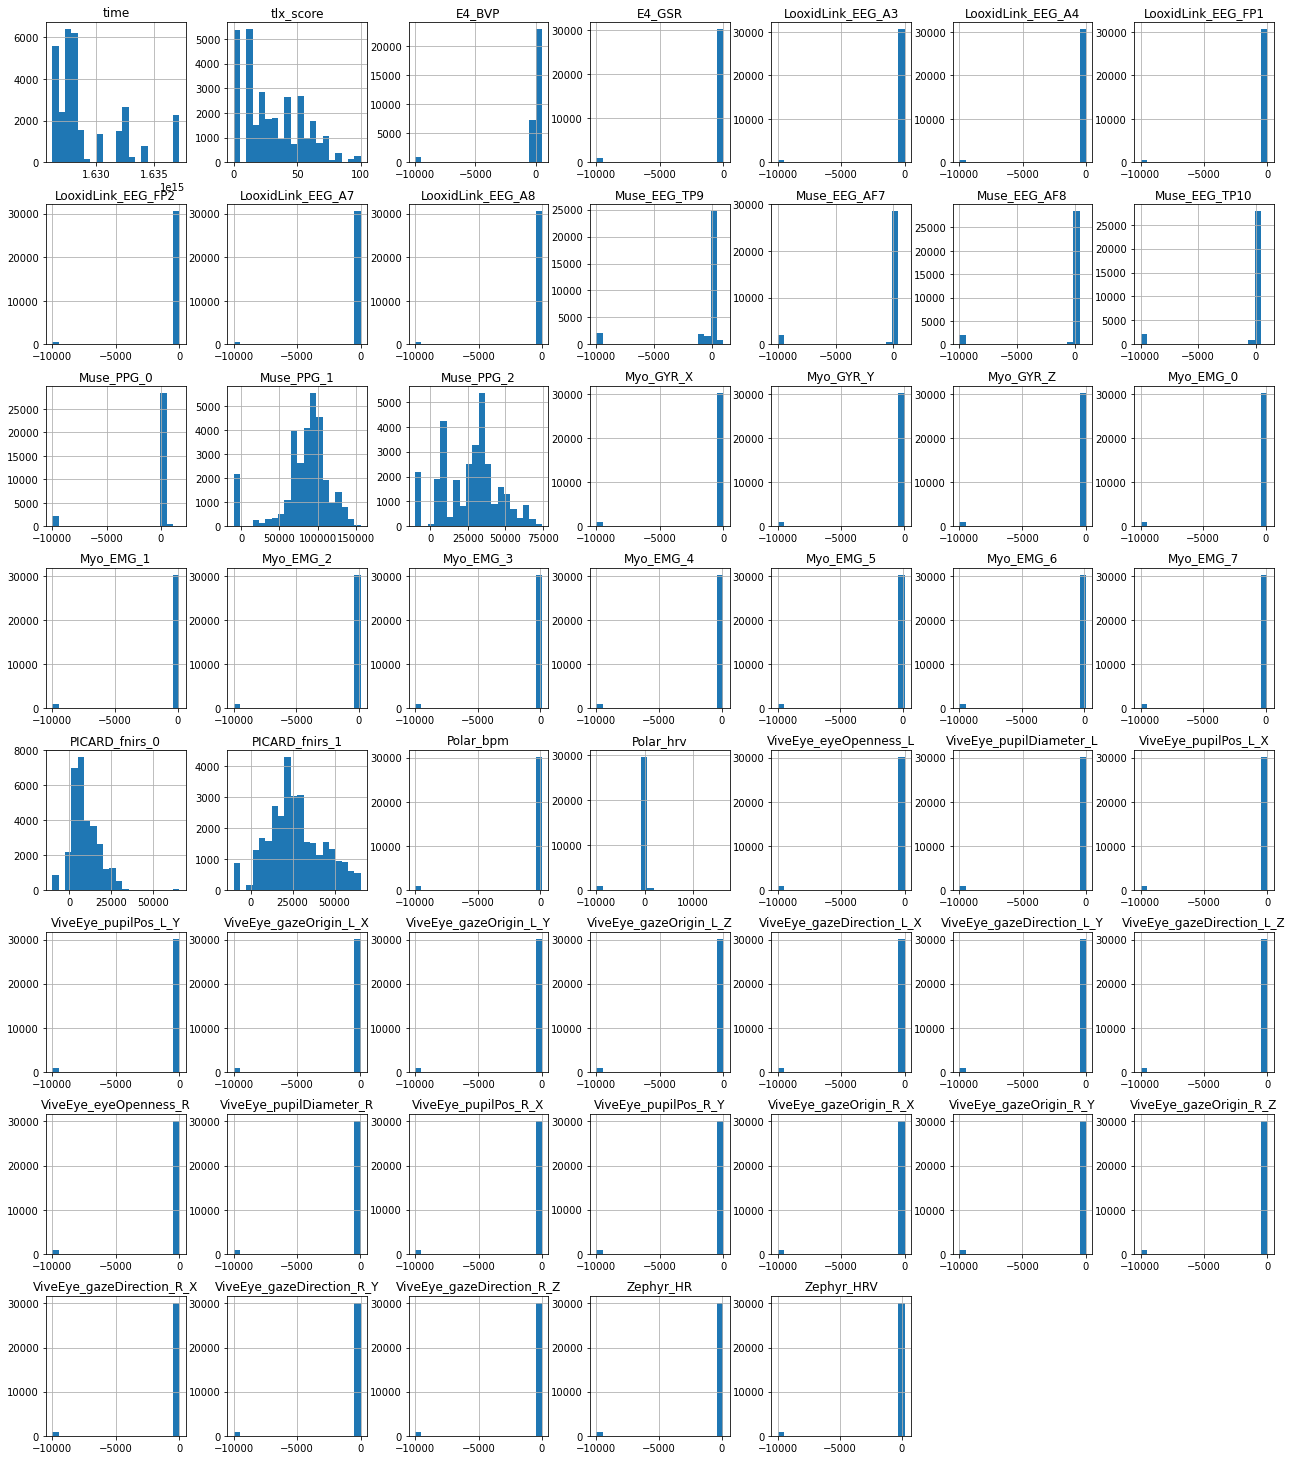

In [128]:
# check the value distributinon 
df.hist(bins=20, figsize=(22, 26))

In [130]:
# TWO OBJECT COLS => Value Counts
obj_cols = ['test_suite', 'induced_state']

for c in obj_cols:
    print(f'---- {c} ----')
    print(df[c].nunique())
    print(df[c].value_counts())

---- test_suite ----
85
Training-Test-009    1038
Training-Test-067     894
Training-Test-052     890
Training-Test-035     871
Training-Test-014     822
                     ... 
Training-Test-044     143
Training-Test-074     136
Training-Test-040     131
Training-Test-072      59
Training-Test-011       6
Name: test_suite, Length: 85, dtype: int64
---- induced_state ----
6
high           8263
medium         6915
low            6386
baseline       6358
channelized    3120
surprise         81
Name: induced_state, dtype: int64


In [101]:
df.groupby('induced_state')['tlx_score'].agg(['mean', 'median']).sort_values('mean')

,mean,median
induced_state,,
baseline,9.922932,10
surprise,13.827160,10
low,25.446289,20
medium,33.777151,40
channelized,34.335577,35
high,41.584897,50


In [88]:
dict(zip(df['low', 'medium', 'high', 'baseline', 'channelized', 'surprise'].unique(), np.arange(6)))

{'baseline': 0,
 'channelized': 1,
 'low': 2,
 'medium': 3,
 'high': 4,
 'surprise': 5}

In [ ]:
label = dict(zip())"low", medium, high, baseline, channelized, surprise}

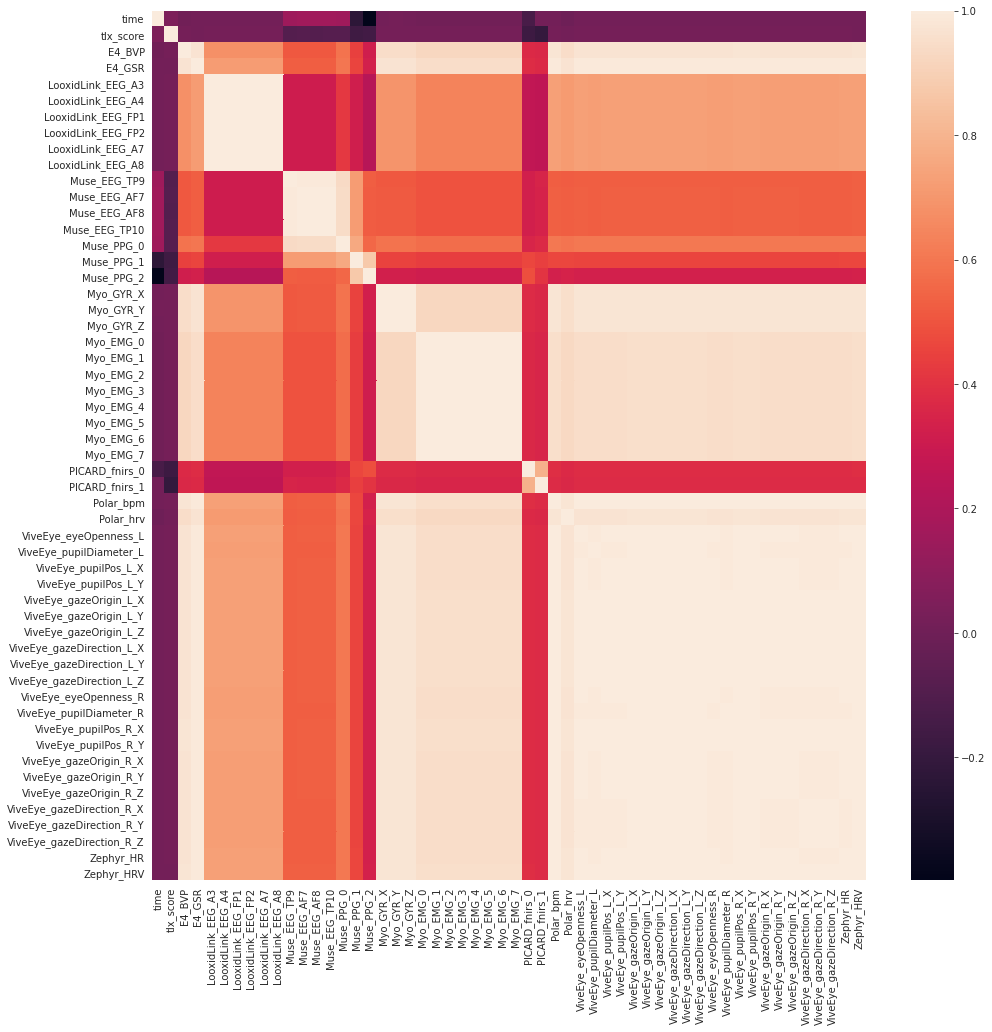

In [75]:
corr = df.corr()

# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 16))
    ax = sns.heatmap(corr, #mask=mask, 
                     xticklabels=corr.columns, yticklabels=corr.columns)

In [42]:
df.test_suite.value_counts()

Training-Test-009    1038
Training-Test-067     894
Training-Test-052     890
Training-Test-035     871
Training-Test-014     822
                     ... 
Training-Test-044     143
Training-Test-074     136
Training-Test-040     131
Training-Test-072      59
Training-Test-011       6
Name: test_suite, Length: 85, dtype: int64

### Exploring Train Data

In [3]:
train = pd.read_csv(TRAIN_PATH, nrows=1000000)

In [4]:
train.head()

,time,test_suite,induced_state,tlx_score,E4_BVP,E4_GSR,LooxidLink_EEG_A3,LooxidLink_EEG_A4,LooxidLink_EEG_FP1,LooxidLink_EEG_FP2,LooxidLink_EEG_A7,LooxidLink_EEG_A8,Muse_EEG_TP9,Muse_EEG_AF7,Muse_EEG_AF8,Muse_EEG_TP10,Muse_PPG_0,Muse_PPG_1,Muse_PPG_2,Myo_GYR_X,Myo_GYR_Y,Myo_GYR_Z,Myo_EMG_0,Myo_EMG_1,Myo_EMG_2,Myo_EMG_3,Myo_EMG_4,Myo_EMG_5,Myo_EMG_6,Myo_EMG_7,PICARD_fnirs_0,PICARD_fnirs_1,Polar_bpm,Polar_hrv,ViveEye_eyeOpenness_L,ViveEye_pupilDiameter_L,ViveEye_pupilPos_L_X,ViveEye_pupilPos_L_Y,ViveEye_gazeOrigin_L_X,ViveEye_gazeOrigin_L_Y,ViveEye_gazeOrigin_L_Z,ViveEye_gazeDirection_L_X,ViveEye_gazeDirection_L_Y,ViveEye_gazeDirection_L_Z,ViveEye_eyeOpenness_R,ViveEye_pupilDiameter_R,ViveEye_pupilPos_R_X,ViveEye_pupilPos_R_Y,ViveEye_gazeOrigin_R_X,ViveEye_gazeOrigin_R_Y,ViveEye_gazeOrigin_R_Z,ViveEye_gazeDirection_R_X,ViveEye_gazeDirection_R_Y,ViveEye_gazeDirection_R_Z,Zephyr_HR,Zephyr_HRV
0,1626275540354390,Training-Test-038,baseline,10,-9999.9,-9999.9,-0.002007,-0.059057,0.030180,0.010290,0.072202,0.051781,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9000,-9999.90000,-9999.9000,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9
1,1626275540356392,Training-Test-038,baseline,10,-9999.9,-9999.9,-0.002009,-0.059058,0.030178,0.010288,0.072199,0.051776,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9000,-9999.90000,-9999.9000,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9
2,1626275540358394,Training-Test-038,baseline,10,-9999.9,-9999.9,-0.002008,-0.059057,0.030180,0.010289,0.072201,0.051776,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9000,-9999.90000,-9999.9000,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9
3,1626275540359776,Training-Test-038,baseline,10,-9999.9,-9999.9,-0.002008,-0.059057,0.030180,0.010289,0.072201,0.051776,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-27.2645,-7.50266,-37.9508,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9
4,1626275540359776,Training-Test-038,baseline,10,-9999.9,-9999.9,-0.002008,-0.059057,0.030180,0.010289,0.072201,0.051776,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,0.0,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-27.2645,-7.50266,-37.9508,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9


In [49]:
train[train.test_suite == 'Training-Test-038'].induced_state.value_counts()

high           260786
medium         256804
low            208568
channelized    146265
baseline       117791
Name: induced_state, dtype: int64

In [5]:
train38 = train[train.test_suite == 'Training-Test-038']

In [51]:
train38.groupby('induced_state')['tlx_score'].agg(['mean', 'median']).sort_values('mean')

,mean,median
induced_state,,
baseline,10.000000,10
channelized,31.000000,31
low,36.063912,38
medium,50.100641,45
high,58.014395,70


In [10]:
train38.sample(5)

,time,test_suite,induced_state,tlx_score,E4_BVP,E4_GSR,LooxidLink_EEG_A3,LooxidLink_EEG_A4,LooxidLink_EEG_FP1,LooxidLink_EEG_FP2,LooxidLink_EEG_A7,LooxidLink_EEG_A8,Muse_EEG_TP9,Muse_EEG_AF7,Muse_EEG_AF8,Muse_EEG_TP10,Muse_PPG_0,Muse_PPG_1,Muse_PPG_2,Myo_GYR_X,Myo_GYR_Y,Myo_GYR_Z,Myo_EMG_0,Myo_EMG_1,Myo_EMG_2,Myo_EMG_3,Myo_EMG_4,Myo_EMG_5,Myo_EMG_6,Myo_EMG_7,PICARD_fnirs_0,PICARD_fnirs_1,Polar_bpm,Polar_hrv,ViveEye_eyeOpenness_L,ViveEye_pupilDiameter_L,ViveEye_pupilPos_L_X,ViveEye_pupilPos_L_Y,ViveEye_gazeOrigin_L_X,ViveEye_gazeOrigin_L_Y,ViveEye_gazeOrigin_L_Z,ViveEye_gazeDirection_L_X,ViveEye_gazeDirection_L_Y,ViveEye_gazeDirection_L_Z,ViveEye_eyeOpenness_R,ViveEye_pupilDiameter_R,ViveEye_pupilPos_R_X,ViveEye_pupilPos_R_Y,ViveEye_gazeOrigin_R_X,ViveEye_gazeOrigin_R_Y,ViveEye_gazeOrigin_R_Z,ViveEye_gazeDirection_R_X,ViveEye_gazeDirection_R_Y,ViveEye_gazeDirection_R_Z,Zephyr_HR,Zephyr_HRV
637595,1626277293217739,Training-Test-038,high,41,23.38126,0.994050,0.029581,0.005266,0.070716,0.070012,0.088656,0.055549,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,1.62598,-2.49805,-4.87842,1.0,1.0,2.0,26.0,22.0,-28.0,-5.0,3.0,3494.0,12210.0,91.0,36.0671,1.0,2.67488,0.656758,0.741579,30.8028,-3.75085,-35.7014,-0.389038,0.248825,0.886963,1.0,2.61429,0.552242,0.822629,-30.1206,-6.75290,-32.8084,-0.428009,0.286942,0.857010,99.0,35.0
858460,1626278992810686,Training-Test-038,medium,70,14.69540,0.648299,0.031518,0.009316,0.063426,0.062314,0.094478,0.050493,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,8.75244,-4.12305,9.99805,9.0,4.0,12.0,-8.0,-10.0,-1.0,28.0,5.0,3764.0,12817.0,87.0,94.2333,1.0,3.18164,0.470087,0.709156,33.4228,-2.81651,-35.5275,0.073013,0.204208,0.976196,1.0,3.22145,0.400446,0.801378,-28.3803,-6.55428,-31.9479,-0.033981,0.244202,0.969116,84.0,33.0
373180,1626276581189472,Training-Test-038,low,38,24.89845,1.491206,0.014926,0.001288,0.049319,0.030329,0.069572,0.052765,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,12.12600,9.62744,9.49707,-1.0,-2.0,-1.0,4.0,5.0,23.0,-34.0,-2.0,3771.0,11584.0,97.0,23.9822,1.0,2.57568,0.498590,0.742360,33.0159,-4.64157,-33.8881,0.005585,0.273636,0.961807,1.0,2.71461,0.382574,0.831545,-28.2060,-7.25862,-32.8992,0.016418,0.289658,0.956985,101.0,29.0
723845,1626278252095481,Training-Test-038,low,50,23.90662,0.759708,0.030618,0.012097,0.067260,0.070119,0.091634,0.058434,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,6.12793,-7.74854,-11.62700,-2.0,-6.0,1.0,-1.0,17.0,8.0,-12.0,-2.0,3789.0,13247.0,92.0,168.8850,1.0,2.76266,0.466241,0.730464,33.6215,-3.27982,-35.8054,0.057800,0.194244,0.979233,1.0,2.83630,0.405169,0.814863,-28.4313,-6.58159,-32.6690,-0.054840,0.224182,0.972992,85.0,39.0
126916,1626275994726051,Training-Test-038,channelized,31,101.95000,2.927961,0.016884,-0.027212,0.054438,0.055152,0.091485,0.058017,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-3.49902,11.75200,-8.62842,-4.0,-2.0,-1.0,0.0,-2.0,-9.0,13.0,-2.0,4506.0,17149.0,109.0,19.2115,0.0,-1.00000,-1.000000,-1.000000,33.9091,-7.90791,-34.9844,0.000000,0.000000,0.000000,0.0,-1.00000,-1.000000,-1.000000,-26.4736,-8.58578,-33.2325,0.000000,0.000000,0.000000,104.0,26.0


### Exploring Provisional Data

In [34]:
prov = pd.read_csv(PROV_PATH, nrows=100000)

In [35]:
prov.head()

,time,test_suite,tlx_score,E4_BVP,E4_GSR,LooxidLink_EEG_A3,LooxidLink_EEG_A4,LooxidLink_EEG_FP1,LooxidLink_EEG_FP2,LooxidLink_EEG_A7,LooxidLink_EEG_A8,Muse_EEG_TP9,Muse_EEG_AF7,Muse_EEG_AF8,Muse_EEG_TP10,Muse_PPG_0,Muse_PPG_1,Muse_PPG_2,Myo_GYR_X,Myo_GYR_Y,Myo_GYR_Z,Myo_EMG_0,Myo_EMG_1,Myo_EMG_2,Myo_EMG_3,Myo_EMG_4,Myo_EMG_5,Myo_EMG_6,Myo_EMG_7,PICARD_fnirs_0,PICARD_fnirs_1,Polar_bpm,Polar_hrv,ViveEye_eyeOpenness_L,ViveEye_pupilDiameter_L,ViveEye_pupilPos_L_X,ViveEye_pupilPos_L_Y,ViveEye_gazeOrigin_L_X,ViveEye_gazeOrigin_L_Y,ViveEye_gazeOrigin_L_Z,ViveEye_gazeDirection_L_X,ViveEye_gazeDirection_L_Y,ViveEye_gazeDirection_L_Z,ViveEye_eyeOpenness_R,ViveEye_pupilDiameter_R,ViveEye_pupilPos_R_X,ViveEye_pupilPos_R_Y,ViveEye_gazeOrigin_R_X,ViveEye_gazeOrigin_R_Y,ViveEye_gazeOrigin_R_Z,ViveEye_gazeDirection_R_X,ViveEye_gazeDirection_R_Y,ViveEye_gazeDirection_R_Z,Zephyr_HR,Zephyr_HRV
0,1626275615977130,Provisional-Test-025,10,17.03023,6.185013,-0.004482,-0.055402,0.031834,0.015929,0.076924,0.053493,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-10.2471,-3.87451,-12.002,-1.0,-1.0,0.0,-3.0,-1.0,1.0,-2.0,0.0,4432.0,16006.0,104.0,13.9834,1.0,-1.0,-1.0,-1.0,34.7063,-8.03111,-33.964,0.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,-26.5375,-6.44585,-39.1862,0.0,0.0,0.0,105.0,20.0
1,1626275615977670,Provisional-Test-025,10,17.03023,6.185013,-0.004485,-0.055408,0.031831,0.015924,0.076920,0.053490,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-10.2471,-3.87451,-12.002,-1.0,-1.0,0.0,-3.0,-1.0,1.0,-2.0,0.0,4432.0,16006.0,104.0,13.9834,1.0,-1.0,-1.0,-1.0,34.7063,-8.03111,-33.964,0.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,-26.5375,-6.44585,-39.1862,0.0,0.0,0.0,105.0,20.0
2,1626275615979673,Provisional-Test-025,10,17.03023,6.185013,-0.004486,-0.055411,0.031829,0.015926,0.076916,0.053487,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-10.2471,-3.87451,-12.002,-1.0,-1.0,0.0,-3.0,-1.0,1.0,-2.0,0.0,4432.0,16006.0,104.0,13.9834,1.0,-1.0,-1.0,-1.0,34.7063,-8.03111,-33.964,0.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,-26.5375,-6.44585,-39.1862,0.0,0.0,0.0,105.0,20.0
3,1626275615979823,Provisional-Test-025,10,17.03023,6.185013,-0.004486,-0.055411,0.031829,0.015926,0.076916,0.053487,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-10.2471,-3.87451,-12.002,1.0,-2.0,-2.0,-3.0,0.0,-1.0,-1.0,0.0,4432.0,16006.0,104.0,13.9834,1.0,-1.0,-1.0,-1.0,34.7063,-8.03111,-33.964,0.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,-26.5375,-6.44585,-39.1862,0.0,0.0,0.0,105.0,20.0
4,1626275615981675,Provisional-Test-025,10,17.03023,6.185013,-0.004486,-0.055411,0.031830,0.015928,0.076915,0.053488,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-10.2471,-3.87451,-12.002,1.0,-2.0,-2.0,-3.0,0.0,-1.0,-1.0,0.0,4432.0,16006.0,104.0,13.9834,1.0,-1.0,-1.0,-1.0,34.7063,-8.03111,-33.964,0.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,-26.5375,-6.44585,-39.1862,0.0,0.0,0.0,105.0,20.0


In [38]:
prov.shape

(100000, 55)

In [37]:
prov.induced_state.value_counts()

AttributeError: 'DataFrame' object has no attribute 'induced_state'